In [1]:
import pandas as pd
from pylab import *
from tb_DataReader import EventFeaturesReader
from tb_PulseAmpFitter import PulseAmpFitter
import ROOT


%matplotlib inline
dataDir = "../data/eventFeatures"

Welcome to JupyROOT 6.16/00


In [2]:
run,backend, channel="219","ubcm",2
#run,backend, channel="222","ubcm",2
#run,backend, channel = "237","ubcm",0
rd = EventFeaturesReader(dataDir,"000"+run,backend)

# 1. Fit Data

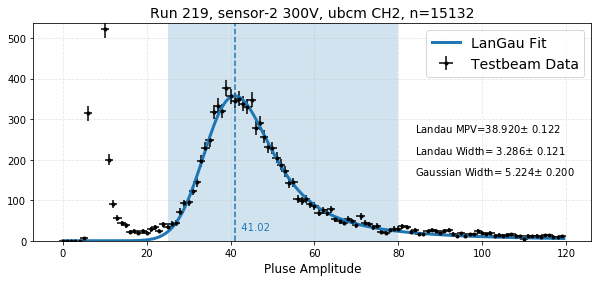

 FCN=31.5866 FROM MIGRAD    STATUS=CONVERGED     622 CALLS         623 TOTAL
                     EDM=3.31131e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   3.28635e+00   1.20890e-01   3.00323e-04   5.22373e-03
   2  LandauMPV    3.89202e+01   1.21778e-01   4.22485e-04  -1.72190e-03
   3  Normalisation   1.74649e+03   7.35825e+01   7.50604e-02  -1.56828e-05
   4  GaussianSigma   5.22409e+00   2.00467e-01   2.09843e-04  -1.22750e-03
                               ERR DEF= 0.5


In [3]:
ch = rd.getChannel(channel)
title = "Run {}, sensor-{} {}V, {} CH{}, n={}".format(run,2, 300,backend,channel,len(ch))
# fitting
fitter = PulseAmpFitter(ch.pulseAmp)
fitter.fitRange(25,80, None)
# plot
fitter.plot()
plt.title(title, fontsize=14)
#plt.savefig("../plots/example_free_langaus_{}_run{}_{}.png".format(backend,run,channel),dpi=300)


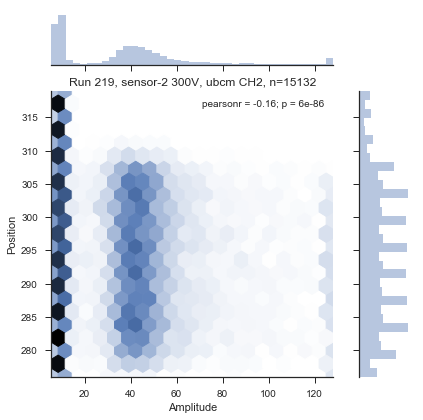

In [4]:
import seaborn as sns
sns.set(style="ticks")
jp= sns.jointplot(ch.pulseAmp, ch.pulsePos, kind="hex", color="C0",gridsize=20,ratio=4,space=0.5)
jp.set_axis_labels(r'Amplitude','Position')
#jp.ax_joint.plot([0,100])
jp.ax_joint.set_title(title)
#plt.savefig("../plots/PulseHist2D/{}_run{}_{}.png".format(backend,run,channel),dpi=300)